# Matrix Factorization(SGD)
- Team 메로나 김태윤

## SGD(확률적 경사 하강법)란?
- 전체 데이터를 사용하는 것이 아닌, **랜덤하게 추출한 일부 데이터를 사용하는 것**
- 따라서 학습 중간 과정에서 결과의 진폭이 크고 불안정하며, 속도가 매우 빠른것이 특징
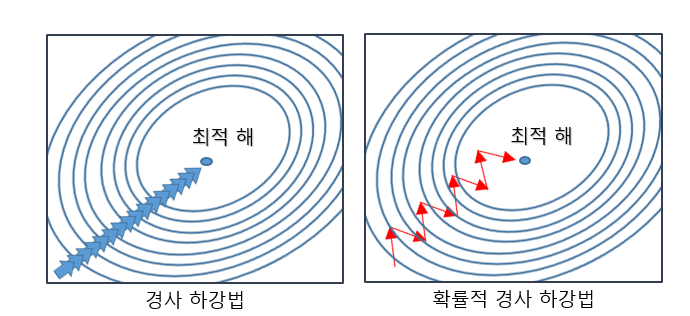


In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
u_data_src = os.path.join('u.data')
r_cols = ['user_id', 'movie_id', 'rating', 'timestampe']
ratings = pd.read_csv(u_data_src,
                     sep='\t',
                     names = r_cols,
                     encoding='latin-1')

# timestampe 제거
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)

In [3]:
print(type(ratings))
ratings

<class 'pandas.core.frame.DataFrame'>


,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


## 전체 코드

In [4]:
class MF():
    def __init__(self, ratings, hyper_params):
        self.R = np.array(ratings)
        self.num_users, self.num_items = np.shape(self.R)
        self.K = hyper_params['K']
        self.alpha = hyper_params['alpha']
        self.beta = hyper_params['beta']
        self.iterations = hyper_params['iterations']
        self.verbose = hyper_params['verbose']
    
    def rmse(self):
        xs, ys = self.R.nonzero()
        self.predictions = []
        self.errors = []
        
        for x,y in zip(xs, ys):
            prediction = self.get_prediction(x,y)
            self.predictions.append(prediction)
            self.errors.append(self.R[x,y] - prediction)
        
        self.predictions = np.array(self.predictions)
        self.errors = np.array(self.errors)
        
        return np.sqrt(np.mean(self.errors**2))
    
    def train(self):
        self.P = np.random.normal(scale=1./self.K,
                                 size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K,
                                 size=(self.num_items, self.K))
        self.b_u = np.zeros(self.num_users)
        self.b_d = np.zeros(self.num_items)
        self.b = np.mean(self.R[self.R.nonzero()])
        
        rows, columns = self.R.nonzero()
        self.samples = [(i,j,self.R[i,j]) for i,j in zip(rows, columns)]
        
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            rmse = self.rmse()
            training_process.append((i+1, rmse))
            if self.verbose:
                if(i+1) % 10 == 0:
                    print('Iteration : %d ; train RMSE = %.4f '%(i+1, rmse))
    
    def get_prediction(self,i,j):
        prediction = self.b + self.b_u[i] + self.b_d[j] + self.P[i,:].dot(self.Q[j,].T)
        return prediction
    
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_prediction(i, j)
            
            e = (r-prediction)
            
            self.b_u[i] += self.alpha * (e - (self.beta * self.b_u[i]))
            self.b_d[j] += self.alpha * (e - (self.beta * self.b_d[i]))
            
            self.P[i, :] += self.alpha * ((e * self.Q[j, :]) - (self.beta * self.P[i, :]))
            self.P[i, :] += self.alpha * ((e * self.P[i, :]) - (self.beta * self.Q[j, :]))
    
R_temp = ratings.pivot(index = 'user_id',
                          columns = 'movie_id',
                          values='rating').fillna(0)
    
hyper_params = {   
    'K' : 30,
    'alpha' : 0.001,
    'beta' : 0.02,
    'iterations' : 100,
    'verbose' : True
}
    
mf = MF(R_temp, hyper_params)
train_process = mf.train()
            


Iteration : 10 ; train RMSE = 0.9585 
Iteration : 20 ; train RMSE = 0.9376 
Iteration : 30 ; train RMSE = 0.9288 
Iteration : 40 ; train RMSE = 0.9239 
Iteration : 50 ; train RMSE = 0.9209 
Iteration : 60 ; train RMSE = 0.9189 
Iteration : 70 ; train RMSE = 0.9174 
Iteration : 80 ; train RMSE = 0.9163 
Iteration : 90 ; train RMSE = 0.9154 
Iteration : 100 ; train RMSE = 0.9147 


## Matrix Factorization 구현
---
#### def __init__(self, ratings, hyper_params):
- self.R : dataframe 형식으로 전달 된 데이터를 numpy array로 변환
- self.num_users, self.num_items : 유저와 아이템 데이터
- self.K : 잠재요인의 개수
- self.alpha : learning rate(학습률)
- self.beta : 정규화 계수
- self.iterations : 반복횟수
- self.verbose : 학습 과정을 출력하는지

In [19]:
class MF():
    def __init__(self, ratings, hyper_params):
        self.R = np.array(ratings)
        self.num_users, self.num_items = np.shape(self.R)
        self.K = hyper_params['K']
        self.alpha = hyper_params['alpha']
        self.beta = hyper_params['beta']
        self.iterations = hyper_params['iterations']
        self.verbose = hyper_params['verbose']

#### def rmse(self):
- rmse를 계산하는 함수
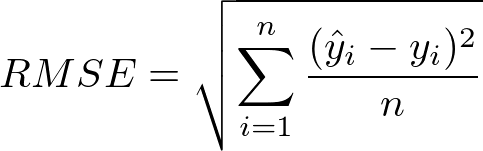
- 여기에서는 errors 가 (yhat - y)
- Self.R.nonzero() 레이팅 데이터의 0이 아닌 요소의 인덱스
- zip() 함수는 서로 짝을 맞춰주는 함수 ex) a = [1,2] b = ['A', 'B'] ~ zip(a,b) (1, 'A') (2, 'B')
- predictions와 errors의를 np.array 형태로 변환


In [20]:
    def rmse(self):
        
            xs, ys = self.R.nonzero()
            #predictions과 error 를 담는 list
            self.predictions = []
            self.errors = []
        
            for x,y in zip(xs, ys):
                # 실제 예측  값
                prediction = self.get_prediction(x,y)
                self.predictions.append(prediction)
                
                #오차 값
                self.errors.append(self.R[x,y] - prediction)
        
            self.predictions = np.array(self.predictions)
            self.errors = np.array(self.errors)
        
            return np.sqrt(np.mean(self.errors**2))

Iteration : 10 ; train RMSE = 0.9585 
Iteration : 20 ; train RMSE = 0.9376 
Iteration : 30 ; train RMSE = 0.9288 
Iteration : 40 ; train RMSE = 0.9239 
Iteration : 50 ; train RMSE = 0.9209 
Iteration : 60 ; train RMSE = 0.9189 
Iteration : 70 ; train RMSE = 0.9174 
Iteration : 80 ; train RMSE = 0.9163 
Iteration : 90 ; train RMSE = 0.9154 
Iteration : 100 ; train RMSE = 0.9147 


#### def train(self):
- **P와 Q의 행렬을 구하는게 MF의 핵심**
- np.random.normal()로 난수 생성(초기화)
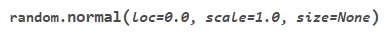
- np.random.normal(scale=1./self.K,size=(self.num_users, self.K))
- 아무 값이나 해도 되지만, 정규분포에서 난수 생성하는게 일반적 
- scale은 표준편차, (1/잠재요인의 갯수 K)
- self.b_u : 사용자 평가 경향
- self.b_d : 아이템 평가 경향
- self.b : 평점의 전체 평균

###### self.samples = [(i,j,self.R[i,j]) for i,j in zip(rows, columns)]
- i,j는 인덱스, R[i,j]는 평점를 list형태로 만들어서 sample에 저장.


In [ ]:
 def train(self):
        #값 초기화, 크기에 맞게 초기화
        self.P = np.random.normal(scale=1./self.K,
                                 size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K,
                                 size=(self.num_items, self.K))
        self.b_u = np.zeros(self.num_users)
        self.b_d = np.zeros(self.num_items)
        
        #0이 아닌 R의 평균
        self.b = np.mean(self.R[self.R.nonzero()])
        
        # 평점이 있는 요소의 인덱스만 가져옴
        rows, columns = self.R.nonzero()
        
        #
        self.samples = [(i,j,self.R[i,j]) for i,j in zip(rows, columns)]
        
        training_process = []
        
        #몇 번 반복할건지
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            #sgd를 적용
            self.sgd()
            #오차 계산
            rmse = self.rmse()
            training_process.append((i+1, rmse))
            if self.verbose:
                if(i+1) % 10 == 0:
                    print('Iteration : %d ; train RMSE = %.4f '%(i+1, rmse))

#### get_prediction(self,i,j)
- 아래의 식을 구현
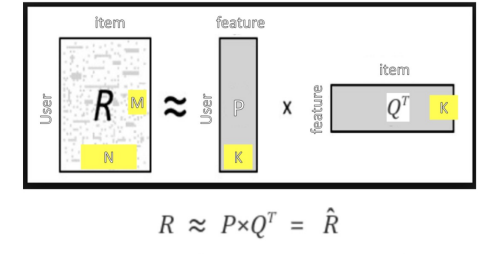
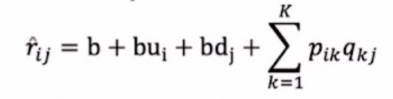
- 전체 평점 + 사용자 평가경향 + 아이템에 대한 평가 경향 + i번째 사용자의 요인 값 + j번째 아이템의 요인 값T


In [ ]:
    def get_prediction(self,i,j):
        prediction = self.b + self.b_u[i] + self.b_d[j] + self.P[i,:].dot(self.Q[j,].T)
        return prediction

#### ef sgd(self):
- 아래의 오차식 
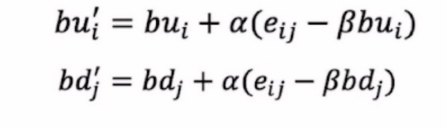

In [ ]:
def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_prediction(i, j)
            
            e = (r-prediction)
            
            self.b_u[i] += self.alpha * (e - (self.beta * self.b_u[i]))
            self.b_d[j] += self.alpha * (e - (self.beta * self.b_d[i]))
            
            self.P[i, :] += self.alpha * ((e * self.Q[j, :]) - (self.beta * self.P[i, :]))
            self.P[i, :] += self.alpha * ((e * self.P[i, :]) - (self.beta * self.Q[j, :]))